# Personal Energy Usage 
<hr/>
<hr/>

In [3]:
# vis 
import matplotlib.pyplot as plt
import seaborn as sns
# pliers
import pandas as pd
import numpy as np


# Contents
- [Data Ingestion](#Data-Ingenstion)
- [Data clean up](#Data-Clean-up)
    - [Propaine Data](#Propaine-Data)
    - [Temperature Data](#Temperature-Data)
- [gasoline](#gasoline)
- [electric](#electric)
- [Propaine](#Propaine)

# Data Ingestion

In [39]:
propaine_df = pd.read_excel('../data/gas_used.xlsx')
print(propaine_df.shape)
propaine_df.head()

(7, 6)


,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99


### Data Dictonary for Temp data

T2M_RANGE MERRA2 1/2x1/2 Temperature Range at 2 Meters (C) 							
T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C) 							
T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C) 							
T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C) 							
TS MERRA2 1/2x1/2 Earth Skin Temperature (C) 							
T2MDEW MERRA2 1/2x1/2 Dew/Frost Point at 2 Meters (C) 							
T2MWET MERRA2 1/2x1/2 Wet Bulb Temperature at 2 Meters (C) 							


In [40]:
# temp data from 

temp_df = pd.read_csv('../data/Daily_20200801_20210225_041d77N_74d28W_89a594ff - POWER_SinglePoint_Daily_20200801_20210225_041d77N_74d28W_89a594ff.csv',
                      skiprows=16) #nrows=10
print(temp_df.shape)
temp_df.head(2)

(209, 12)


,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30


# Data Clean up 
<hr/>

## Propaine Data

In [41]:
propaine_df

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [42]:
# drop the nan rows and redefine the dataframe

propaine_df = propaine_df.drop([0,1])
propaine_df.head()

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [43]:
# rename columns

propaine_df.rename(columns = {'transaction date':'date','invoice number':'invoice'}, inplace = True)
propaine_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [44]:
# convert transaction date to timestamp

propaine_df['date'] = pd.to_datetime(propaine_df['date'])

In [45]:
# reset index 

propaine_df.reset_index(drop=True, inplace = True)
propaine_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [46]:
propaine_df['date'][2]

Timestamp('2020-12-26 00:00:00')

In [47]:
propaine_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99
1,681181.0,2020-11-25,320.20,103.5,6.99,NaN
2,685620.0,2020-12-26,205.99,100.0,6.99,1.99
3,688270.0,2021-01-20,224.70,109.4,6.99,1.99
4,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [48]:
# fill in NaN through calculation 

propaine_df['cost per gal'] = round((320.20 / 103.5),2)

In [49]:
propaine_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,3.09
1,681181.0,2020-11-25,320.20,103.5,6.99,3.09
2,685620.0,2020-12-26,205.99,100.0,6.99,3.09
3,688270.0,2021-01-20,224.70,109.4,6.99,3.09
4,692265.0,2021-02-17,205.99,100.0,6.99,3.09


--- done

## Temperature Data

In [50]:
temp_df.head()

,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30
2,41.77451,-74.27729,2020,8,3,10.66,24.39,16.23,16.03,30.16,19.50,24.56
3,41.77451,-74.27729,2020,8,4,5.20,21.13,20.19,20.17,23.65,18.45,21.14
4,41.77451,-74.27729,2020,8,5,10.10,20.91,16.51,16.40,26.28,16.19,21.01


In [51]:
# creating datatime from multiply columns
#  pandas 18 pd.to_datetime(df[['year', 'month', 'day']]) columns have to be that name

temp_df['DATE'] = pd.to_datetime((temp_df.YEAR*10000+temp_df.MO*100+temp_df.DY).apply(str),format='%Y%m%d')

In [52]:
# Remove old date columns

temp_df.drop(['YEAR','MO','DY'], axis = 1, inplace = True)

In [54]:
# set datetime to index

#temp_df.set_index('DATE', inplace = True)


,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,24.58,15.59,15.42,31.20,16.83,24.66,2020-08-01
1,41.77451,-74.27729,8.73,24.33,20.65,20.57,28.83,20.11,24.30,2020-08-02


In [55]:
temp_df.head(2)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,24.58,15.59,15.42,31.20,16.83,24.66,2020-08-01
1,41.77451,-74.27729,8.73,24.33,20.65,20.57,28.83,20.11,24.30,2020-08-02


In [56]:
temp_df.tail(3)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
206,41.77451,-74.27729,6.09,-1.61,-1.76,-1.62,0.36,-5.72,-1.49,2021-02-23
207,41.77451,-74.27729,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,2021-02-24
208,41.77451,-74.27729,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,2021-02-25


Row 207 & 208 have incorrect data and need to be dropped

In [57]:
# Drop row 207 & 208

temp_df.drop([207,208], axis = 0, inplace = True)

In [60]:
# converts C to F 

# lambda function C to F
c_to_f = lambda x : (x * 9/5) + 32 
# apply lambda to TS & T2M
temp_df['TS'] = c_to_f(temp_df['TS'])
temp_df['T2M'] = c_to_f(temp_df['T2M'])

In [61]:
temp_df.head(2)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,76.244,15.59,15.42,31.20,16.83,76.388,2020-08-01
1,41.77451,-74.27729,8.73,75.794,20.65,20.57,28.83,20.11,75.740,2020-08-02


In [79]:
# simplyfy dataset

# creates a list of columns to drop
column_name = temp_df.columns
column_name = column_name.drop(['T2M','DATE','TS'])
# drops columns
temp_df.drop(column_name, inplace = True, axis = 1)

In [85]:
temp_df

,TS,T2M,DATE
0,76.244,76.388,2020-08-01
1,75.794,75.740,2020-08-02
2,75.902,76.208,2020-08-03
3,70.034,70.052,2020-08-04
4,69.638,69.818,2020-08-05
...,...,...,...
202,21.218,21.452,2021-02-19
203,19.166,19.310,2021-02-20
204,12.992,17.258,2021-02-21
205,23.846,23.972,2021-02-22


In [ ]:
# 

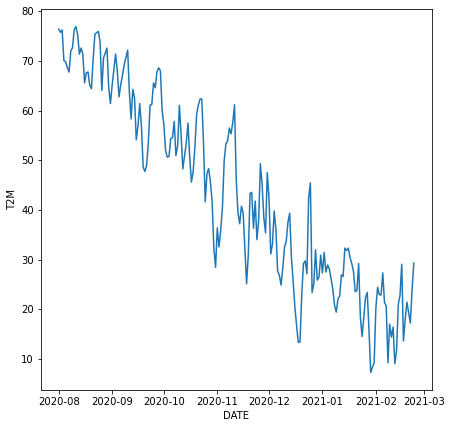

In [86]:

plt.figure(figsize = (7,7))
sns.lineplot(data = temp_df, x = 'DATE', y = 'T2M');

# x & y labels

# add grid

# add more date tics

# add more temp tics



,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30
2,41.77451,-74.27729,2020,8,3,10.66,24.39,16.23,16.03,30.16,19.50,24.56
3,41.77451,-74.27729,2020,8,4,5.20,21.13,20.19,20.17,23.65,18.45,21.14
4,41.77451,-74.27729,2020,8,5,10.10,20.91,16.51,16.40,26.28,16.19,21.01


In [101]:
df_ = pd.read_csv('../data/2469458.csv')
print(df_.shape)
df_.sample(3)

(2604, 13)


,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD,WESF
421,US1NYUL0021,"STONE RIDGE 0.5 WNW, NY US",2020-08-02,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,US1NYUL0019,"WOODSTOCK 0.8 ENE, NY US",2020-11-03,NaN,NaN,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1372,US1NYUL0015,"STONE RIDGE 0.7 N, NY US",2020-12-23,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
_df = pd.read_csv('../data/2469673.csv')
print(_df.shape)
_df.sample(3)

(2604, 26)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,...,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES
1450,US1NYUL0026,"GARDINER 1.3 WNW, NY US",41.685850,-74.173692,68.6,2020-09-09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571,US1NYUL0026,"GARDINER 1.3 WNW, NY US",41.685850,-74.173692,68.6,2021-01-14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,US1NYUL0020,"ULSTER PARK 0.9 NNW, NY US",41.867677,-73.987955,53.6,2021-01-26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
_df_ = pd.read_csv('../data/2469671.csv')
print(_df_.shape)
_df_.sample(3)

(553, 20)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES
400,US1NYUL0026,"GARDINER 1.3 WNW, NY US",41.685850,-74.173692,68.6,2021-01-09,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,US1NYUL0022,"KINGSTON 2.1 N, NY US",41.961037,-73.995767,55.8,2021-01-22,NaN,NaN,NaN,NaN,0.0,"T,,N",0.0,"T,,N",NaN,NaN,NaN,NaN,NaN,NaN
77,US1NYUL0032,"ESOPUS 0.8 NNE, NY US",41.838544,-73.958758,49.4,2021-01-28,NaN,NaN,NaN,NaN,0.0,",,N",0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN


# EDA
<hr />

### Clean data - gas_used.xls

Numpy - playing with pandas -> numpy 

In [104]:
# DataFrame.to_numpy(dtype=None, copy=False, na_value=<object object>)[source]
# view pandas as numpy

print(type(gas_df.to_numpy))
print()
gas_df.to_numpy()

<class 'method'>



array([[nan, NaT, nan, nan, nan, nan],
       [nan, NaT, nan, nan, nan, nan],
       [676952.0, Timestamp('2020-10-02 00:00:00'), 117.04, 55.3, 6.99,
        1.99],
       [681181.0, Timestamp('2020-11-25 00:00:00'), 320.2, 103.5, 6.99,
        nan],
       [685620.0, Timestamp('2020-12-26 00:00:00'), 205.99, 100.0, 6.99,
        1.99],
       [688270.0, Timestamp('2021-01-20 00:00:00'), 224.7, 109.4, 6.99,
        1.99],
       [692265.0, Timestamp('2021-02-17 00:00:00'), 205.99, 100.0, 6.99,
        1.99]], dtype=object)

In [105]:
# drop rows with nans - look but not update

gas_df.drop([0,1])

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [106]:
# delete rows with numpy 

"""
??special handling of scalars??
What is def of scalars and how can they be specially be handled. 
"""

#created numpy array 
x = gas_df.to_numpy()

print(type(x))

## numpy.delete(arr, obj, axis=None)
np.delete(x, [0,1],0)

<class 'numpy.ndarray'>


array([[676952.0, Timestamp('2020-10-02 00:00:00'), 117.04, 55.3, 6.99,
        1.99],
       [681181.0, Timestamp('2020-11-25 00:00:00'), 320.2, 103.5, 6.99,
        nan],
       [685620.0, Timestamp('2020-12-26 00:00:00'), 205.99, 100.0, 6.99,
        1.99],
       [688270.0, Timestamp('2021-01-20 00:00:00'), 224.7, 109.4, 6.99,
        1.99],
       [692265.0, Timestamp('2021-02-17 00:00:00'), 205.99, 100.0, 6.99,
        1.99]], dtype=object)

    practice numpy 


In [108]:
# rename columns

gas_df.rename(columns = {'transaction date':'date','invoice number':'invoice'}, inplace = True)

In [109]:
gas_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [110]:
# convert transaction date to timestamp
gas_df['date'] = pd.to_datetime(gas_df['date'])

In [111]:
# reset index 

gas_df.set_index('date')

,invoice,cost,gal,Environmental Compliance Fee,cost per gal
date,,,,,
2020-10-02,676952.0,117.04,55.3,6.99,1.99
2020-11-25,681181.0,320.20,103.5,6.99,NaN
2020-12-26,685620.0,205.99,100.0,6.99,1.99
2021-01-20,688270.0,224.70,109.4,6.99,1.99
2021-02-17,692265.0,205.99,100.0,6.99,1.99


### Clean Data - temp_df
<hr/>

temp_df.tail()

# 

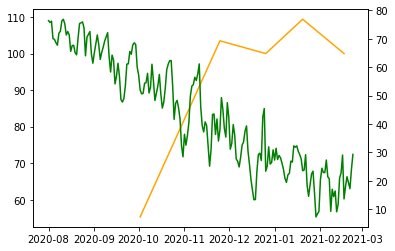

In [143]:
# both plots on one graph 

#temp_df, x = 'DATE', y = 'T2M'

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()


ax_left.plot('date', 'gal', data = gas_df, color='orange') 
ax_right.plot('DATE', 'T2M', data = temp_df, color='green');

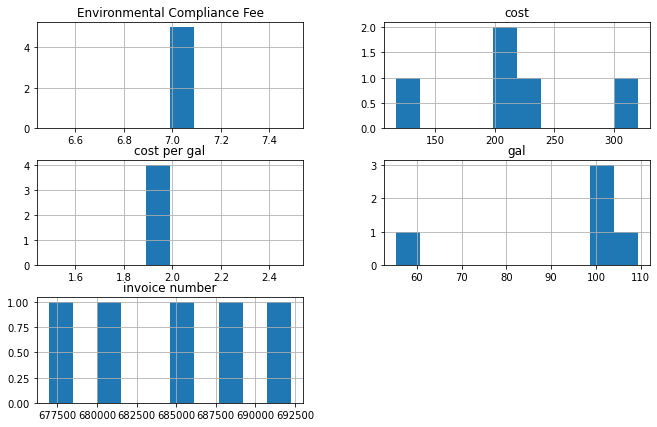

In [15]:
#

df.hist(figsize = (11,7));

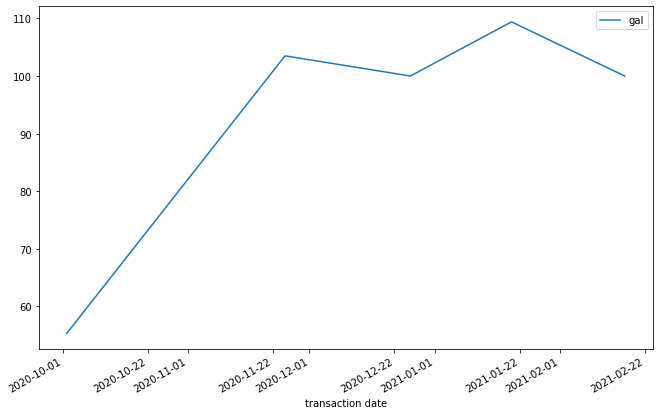

In [18]:


df.plot('transaction date', 'gal', figsize = (11,7));

# Weather Station Data
<hr />

: ---:--- :---:
|a|b|x|
: ---:--- :---:

##  Data Dictory 

Air Temperature

TMAX	Maximum temperature
TMIN	Minimum temperature
TOBS	Temperature at the time of observation

Percipitation

DAPR	Number of days included in the multiday precipitation total (MDPR)
DASF	Number of days included in the multiday snow fall total (MDSF)
MDPR	Multiday precipitation total (use with DAPR and DWPR, if available)
MDSF	Multiday snowfall total
PRCP	Precipitation
SNOW	Snowfall
SNWD	Snow depth

Water

WESD	Water equivalent of snow on the ground
WESF	Water equivalent of snowfall

Weather Type

WT01	Fog, ice fog, or freezing fog (may include heavy fog)
WT03	Thunder
WT04	Ice pellets, sleet, snow pellets, or small hail"
WT05	Hail (may include small hail)
WT06	Glaze or rime
WT08	Smoke or haze
WT09	Blowing or drifting snow
WT10	Tornado, waterspout, or funnel cloud"
WT11	High or damaging winds
WT14	Drizzle
WT16	Rain (may include freezing rain, drizzle, and freezing drizzle)"
WT18	Snow, snow pellets, snow grains, or ice crystals




## Best version of NOAA data

We downloaded the temp data from NOAA in 3 different ways to understand which way is the most complete. 

In [111]:
print(df_.shape)
df_['STATION'].nunique()

(2604, 13)


In [112]:
# by Ulster 

print(_df.shape)
_df['STATION'].nunique()

(2604, 26)


16

In [114]:
print(_df_.shape)
_df_['STATION'].nunique()

(553, 20)


13

    The last version is the most complete 
    _df

In [20]:
# the data  

_df.sample(3).T

,589,1990,1841
STATION,US1NYUL0032,US1NYUL0028,USC00306570
NAME,"ESOPUS 0.8 NNE, NY US","KERHONKSON 3.7 N, NY US","PHONECIA 2 SW, NY US"
LATITUDE,41.8385,41.8321,42.0674
LONGITUDE,-73.9588,-74.3012,-74.3356
ELEVATION,49.4,273.1,323.1
DATE,2020-09-04,2020-09-15,2020-09-19
DAPR,NaN,NaN,NaN
DAPR_ATTRIBUTES,NaN,NaN,NaN
MDPR,NaN,NaN,NaN
MDPR_ATTRIBUTES,NaN,NaN,NaN


? what are the attributes columns?


In [43]:
# how many observations centers are being used 

_df['STATION'].nunique()

16

In [24]:
# names of stations

np.unique(_df['STATION'])

array(['US1NYUL0015', 'US1NYUL0016', 'US1NYUL0019', 'US1NYUL0020',
       'US1NYUL0021', 'US1NYUL0022', 'US1NYUL0023', 'US1NYUL0026',
       'US1NYUL0028', 'US1NYUL0029', 'US1NYUL0031', 'US1NYUL0032',
       'US1NYUL0034', 'USC00305426', 'USC00306570', 'USC00307274'],
      dtype=object)

In [33]:
# list of stations and count of data they have

_df.groupby(['STATION','NAME'])['TOBS'].agg(['count', 'mean'])

,,count,mean
STATION,NAME,,
US1NYUL0015,"STONE RIDGE 0.7 N, NY US",0,NaN
US1NYUL0016,"ROSENDALE VILLAGE 1.8 WNW, NY US",0,NaN
US1NYUL0019,"WOODSTOCK 0.8 ENE, NY US",0,NaN
US1NYUL0020,"ULSTER PARK 0.9 NNW, NY US",0,NaN
US1NYUL0021,"STONE RIDGE 0.5 WNW, NY US",0,NaN
US1NYUL0022,"KINGSTON 2.1 N, NY US",0,NaN
US1NYUL0023,"WEST HURLEY 0.1 S, NY US",0,NaN
US1NYUL0026,"GARDINER 1.3 WNW, NY US",0,NaN
US1NYUL0028,"KERHONKSON 3.7 N, NY US",0,NaN


Only one station, #USC00305426 in Mohonk Lake, NY has a record of temperature.   

In [39]:
# inspect the info from #USC00305426 in Mohonk Lake, NY

_df[_df['STATION'] == 'USC00305426']['DATE']

0     2020-08-01
1     2020-08-02
2     2020-08-03
3     2020-08-04
4     2020-08-05
5     2020-08-06
6     2020-08-07
7     2020-08-08
8     2020-08-09
9     2020-08-10
10    2020-08-11
11    2020-08-12
12    2020-08-13
13    2020-08-14
14    2020-08-15
15    2020-08-16
16    2020-08-17
17    2020-08-18
18    2020-08-19
19    2020-08-20
20    2020-08-21
21    2020-08-22
22    2020-08-23
23    2020-08-24
24    2020-08-25
25    2020-08-26
26    2020-08-27
27    2020-08-28
28    2020-08-29
29    2020-08-30
30    2020-08-31
Name: DATE, dtype: object

     Temp Recordings for Mohonk Lake station where only done in Aug, not in the other months



## _df_

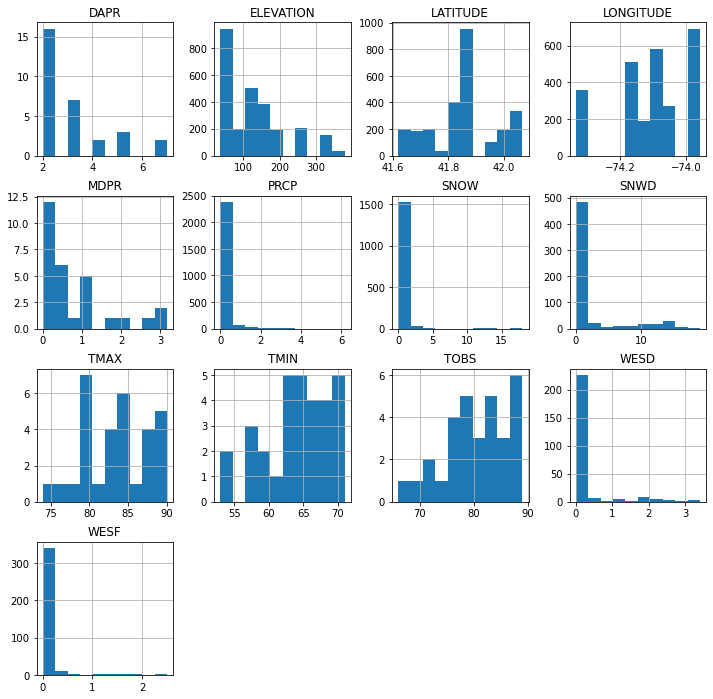

In [44]:
# graphs 

_df.hist(figsize = (12,12));